In [ ]:
!pip install qiskit
!pip install qiskit[visualization]
!pip install qiskit_aer
!pip install qiskit matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=65e8177c0550b5abeeff46a61edb8030720fb9e41d30e4e42cb2e052ab6e0661
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 78.6 MB/s eta 0:00:00


1. Simulating a Quantum Coin Flip
Overview: Simulate a quantum coin flip using a single qubit in superposition to illustrate quantum
randomness.
Steps:
   1. Apply a Hadamard gate to put the qubit in a superposition state.
   2. Measure the qubit to observe a 50/50 distribution between heads and tails.
   3. Run multiple trials and visualize the results.

In [ ]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

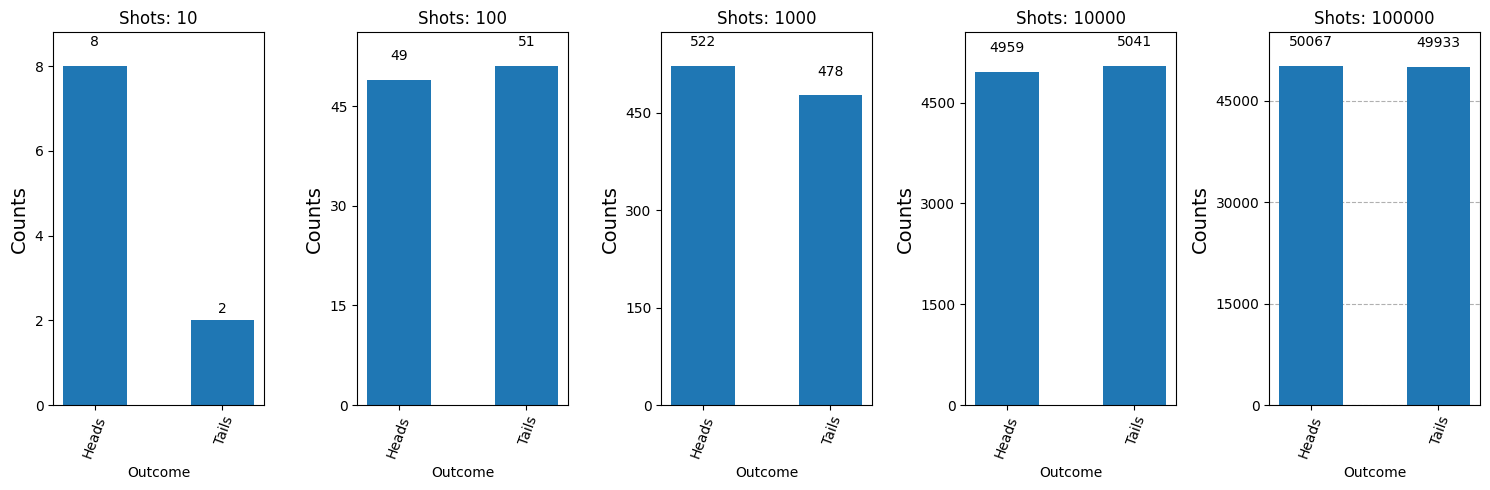

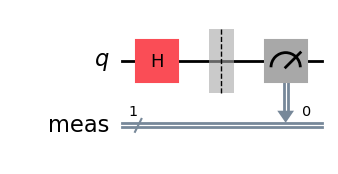

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
shot_counts = [10, 100, 1000, 10000, 100000]
fig, axs = plt.subplots(1, len(shot_counts), figsize=(15, 5))

for ax, shots in zip(axs, shot_counts):
    qobj = q_sim.run(t_qc, shots=shots)
    result = qobj.result()
    counts = result.get_counts(qc)
    counts_modified = {'Heads': counts.get('0', 0), 'Tails': counts.get('1', 0)}
    plot_histogram(counts_modified, ax=ax)
    ax.set_title(f'Shots: {shots}')
    ax.set_xlabel('Outcome')
    ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()
qc.draw('mpl')


2. Visualizing Quantum Superposition
Overview: Create a simple visualization that shows the effect of superposition on a qubit.
Steps:
   1. Apply different quantum gates (e.g., Hadamard) to a qubit and observe the resulting state.
   2. Use a simulator to display the probability of measurement outcomes.
   3. Experiment with multiple qubits to see how superposition scales.

In [ ]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

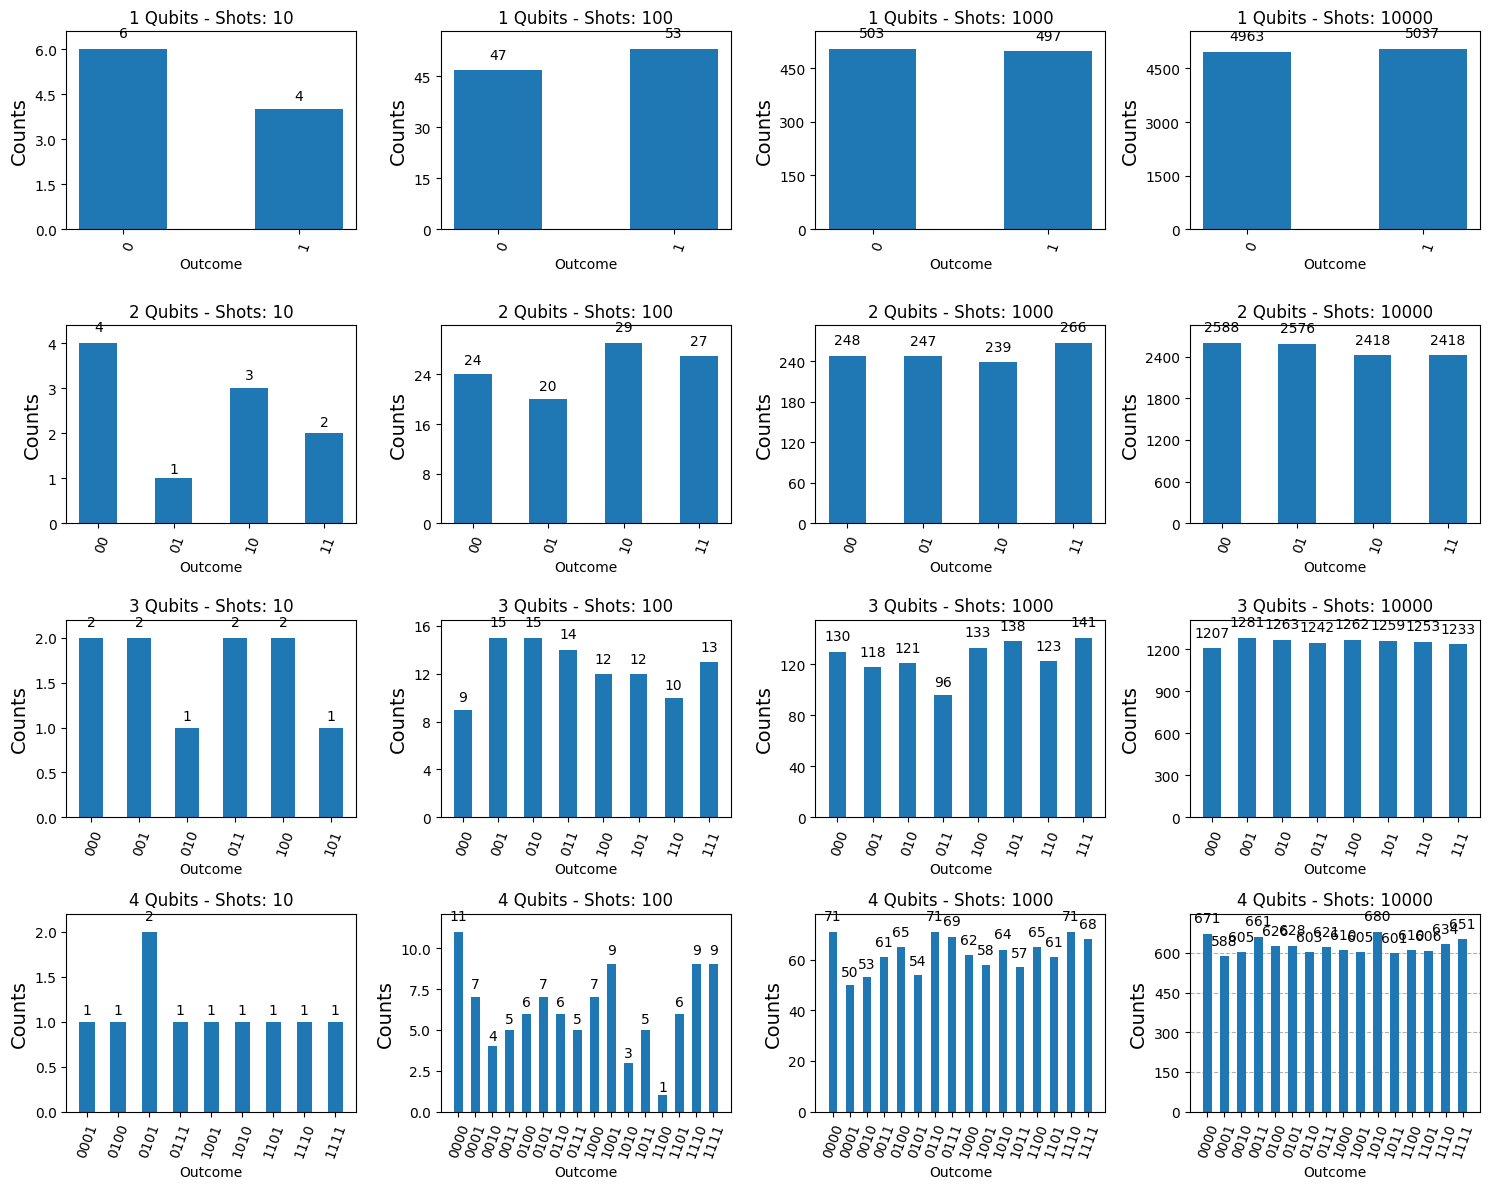

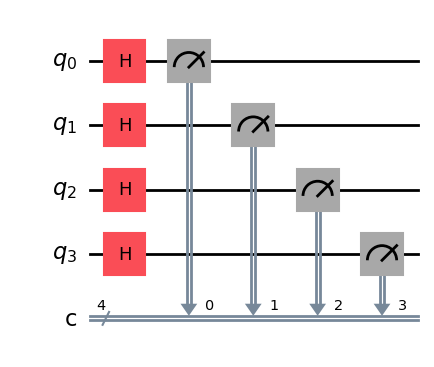

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
shot_counts = [10, 100, 1000, 10000]
fig, axs = plt.subplots(4, len(shot_counts), figsize=(15, 12))

for num_qubits in range(1, 5):
    for ax, shots in zip(axs[num_qubits - 1], shot_counts):
        qc = QuantumCircuit(num_qubits, num_qubits)

        for i in range(num_qubits):
            qc.h(i)

        qc.measure(range(num_qubits), range(num_qubits))
        t_qc = transpile(qc, q_sim)
        qobj = q_sim.run(t_qc, shots=shots)
        result = qobj.result()
        counts = result.get_counts(qc)
        plot_histogram(counts, ax=ax)
        ax.set_title(f'{num_qubits} Qubits - Shots: {shots}')
        ax.set_xlabel('Outcome')
        ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()
qc.draw('mpl')


3. Quantum Random Number Generator
Overview: Use quantum mechanics to generate random numbers with a single qubit.
Steps:

   1. Prepare a qubit in a superposition state using the Hadamard gate.
   2. Measure the qubit to generate a random bit (0 or 1).
   3. Run the circuit multiple times to create a sequence of random numbers.

In [ ]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt

Generated random numbers: [1, 0, 1, 1, 0, 1, 0, 0, 0, 1]


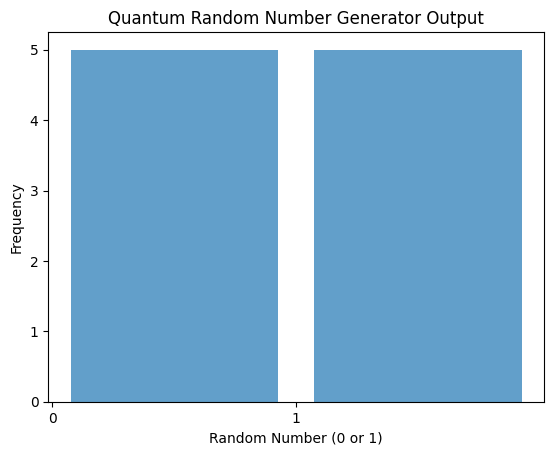

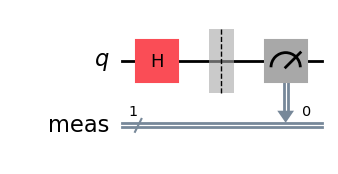

In [ ]:
def quantum_random_number_generator(num_samples):
    qc = QuantumCircuit(1)
    qc.h(0)
    qc.measure_all()

    q_sim = AerSimulator()
    random_numbers = []
    for _ in range(num_samples):
        t_qc = transpile(qc, q_sim)
        qobj = q_sim.run(t_qc, shots=1)
        result = qobj.result()
        counts = result.get_counts(qc)
        random_bit = '0' if counts.get('0', 0) > 0 else '1'
        random_numbers.append(int(random_bit))

    return random_numbers
num_samples = 10
random_numbers = quantum_random_number_generator(num_samples)

print("Generated random numbers:", random_numbers)

plt.hist(random_numbers, bins=[0, 1, 2], alpha=0.7, rwidth=0.85)
plt.xticks([0, 1])
plt.xlabel('Random Number (0 or 1)')
plt.ylabel('Frequency')
plt.title('Quantum Random Number Generator Output')

plt.show()
qc.draw('mpl')

4. Building a Simple Quantum Circuit
Overview: Design and simulate a basic quantum circuit that applies a series of quantum gates to a
qubit.
Steps:
  1. Use gates like X (NOT), Z, and Hadamard to manipulate a single qubit.
  2. Measure the qubit’s final state.
  3. Experiment by changing the order of gates and observe the different outputs.

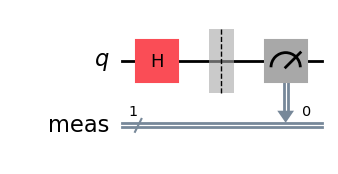

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

NameError: name 'AerSimulator' is not defined

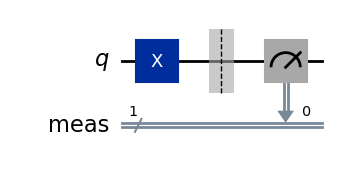

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'1': 1024}



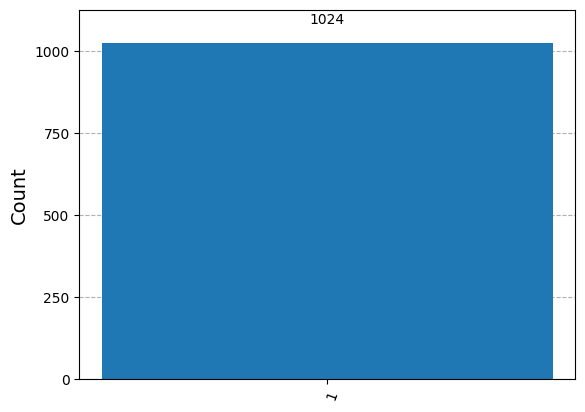

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

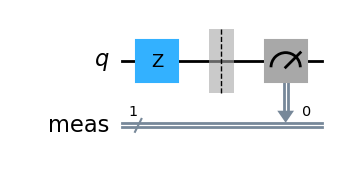

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 510, '1': 514}



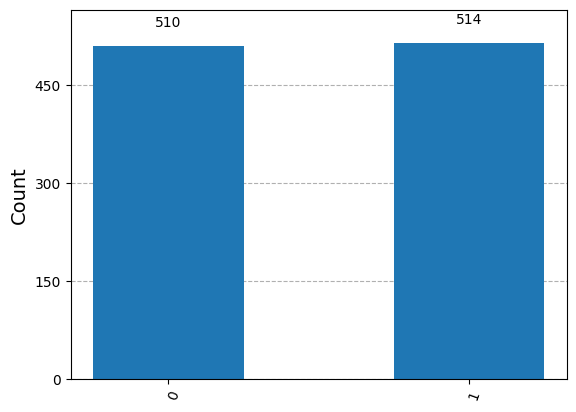

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

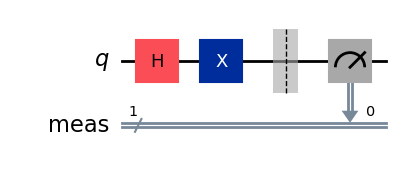

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 518, '1': 506}



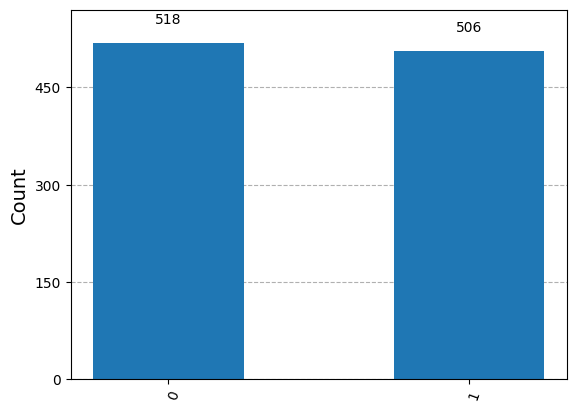

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

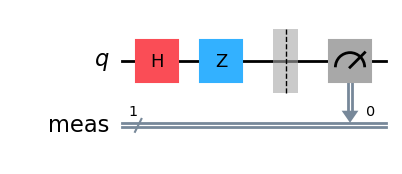

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 529, '1': 495}



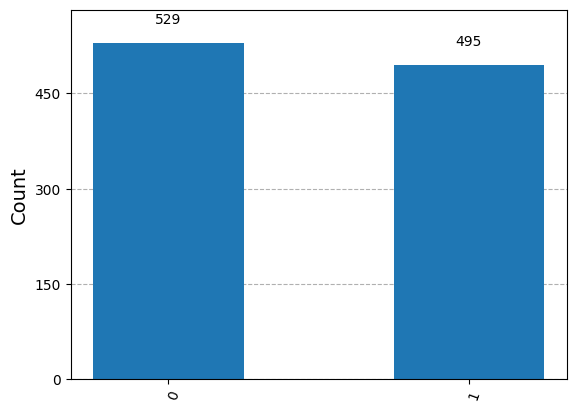

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

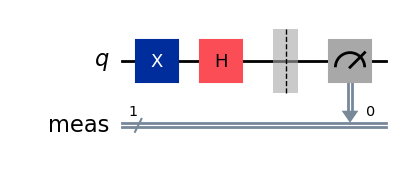

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'1': 531, '0': 493}



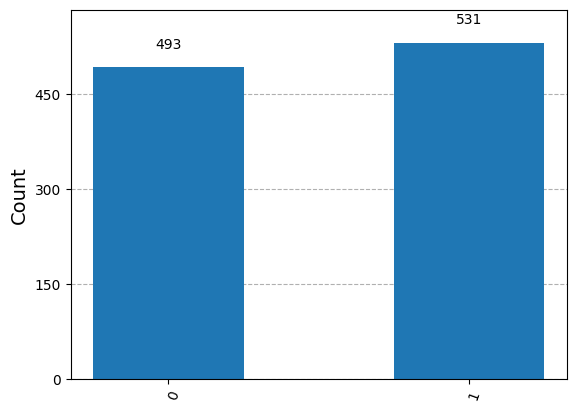

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

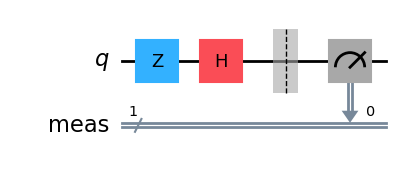

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 519, '1': 505}



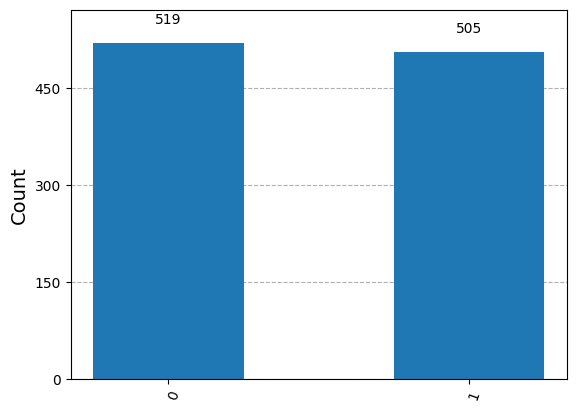

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

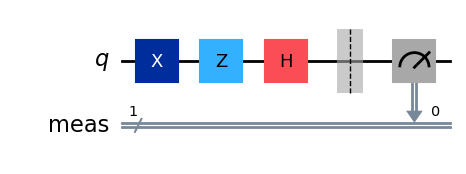

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.z(0)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 517, '1': 507}



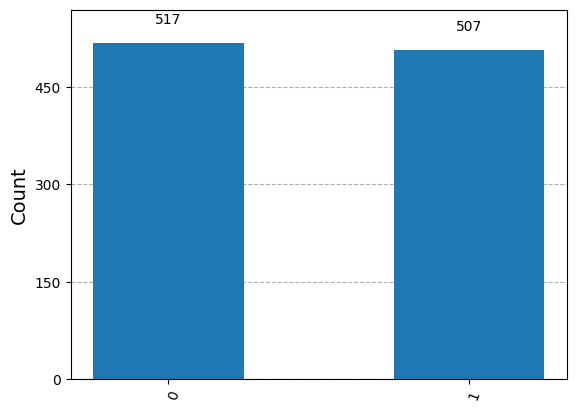

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

5. Simulating a Bell State (Quantum Entanglement)
Overview: Create a simple two-qubit circuit to produce an entangled Bell state.
Steps:
 1. Apply a Hadamard gate to the first qubit.
 2. Apply a CNOT gate with the first qubit as control and the second as target.
 3. Measure both qubits and observe correlated outcomes.

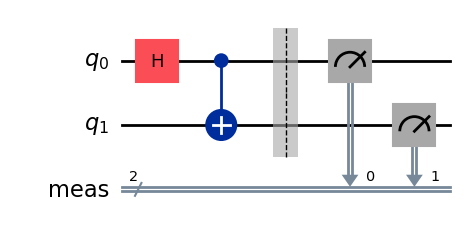

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'00': 512, '11': 512}



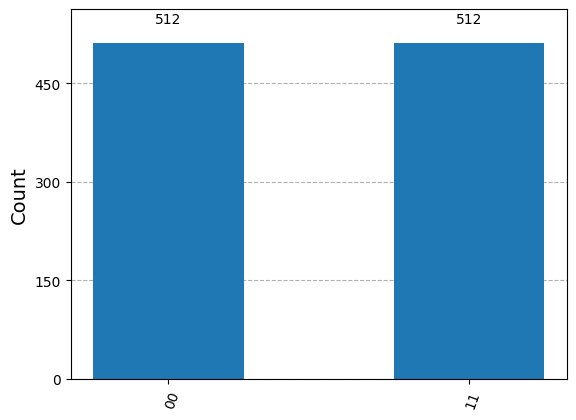

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)

print(f"Measurement results: {counts}\n")
plot_histogram(counts)


# 6. Exploring Quantum Measurement
Overview: Create a circuit that demonstrates the effect of measurement on quantum states.
Steps:
  1. Apply a Hadamard gate to a qubit to put it in superposition.
  2. Measure the qubit and observe the effect on its state.
  3. Repeat the experiment with other gates and observe different outcomes.

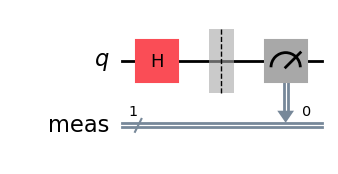

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 496, '1': 528}



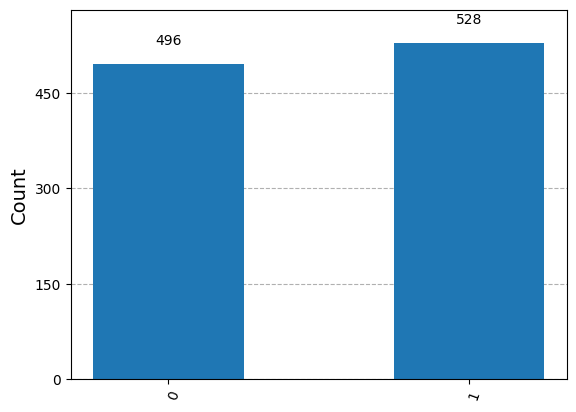

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

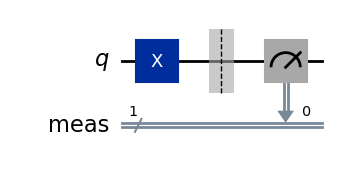

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'1': 1024}



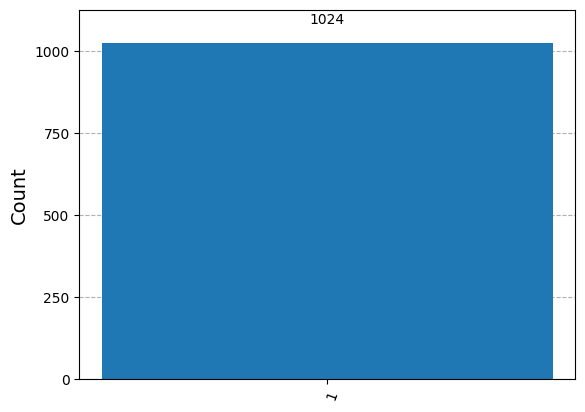

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

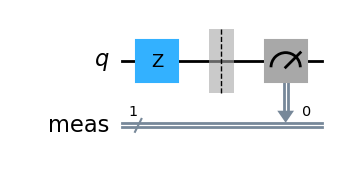

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 1024}



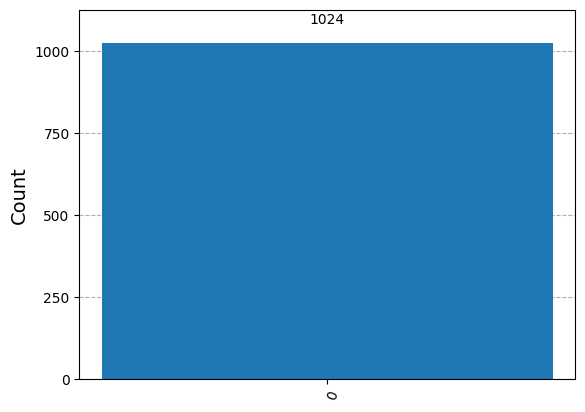

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

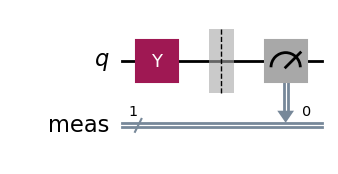

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'1': 1024}



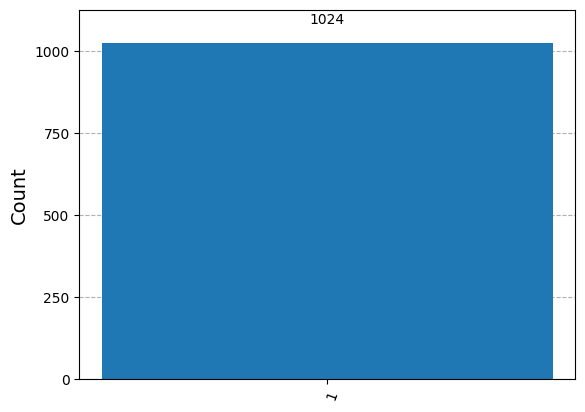

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

7. Creating a Quantum NOT Gate
Overview: Use a quantum X gate to simulate a NOT operation on a qubit.
Steps:
  1. Start with a qubit in state |0⟩.
  2. Apply an X gate to flip it to state |1⟩.
  3. Measure the qubit to confirm the flip.

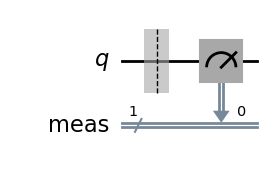

In [ ]:
qc = QuantumCircuit(1)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'0': 1024}



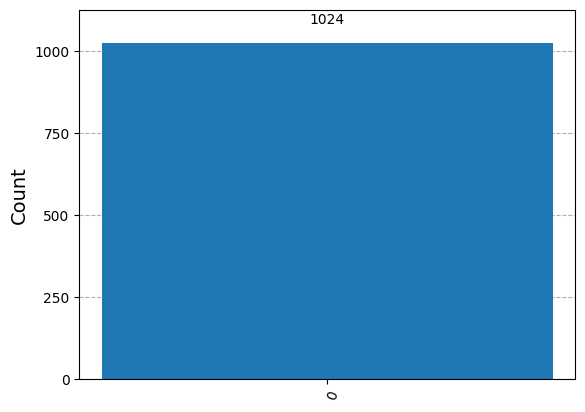

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

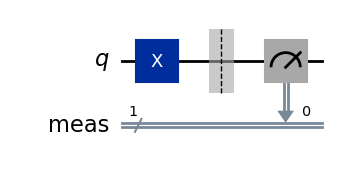

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'1': 1024}



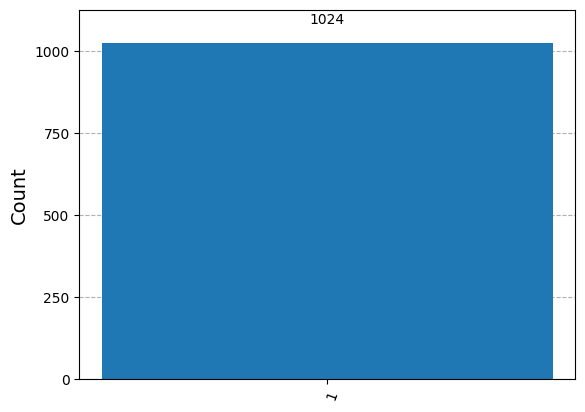

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

8. Simulating Quantum Interference with the Hadamard Gate
Overview: Show how interference can cancel out certain probabilities.
Steps:
 1. Prepare a two-qubit circuit where each qubit undergoes a Hadamard operation.
 2. Apply a CNOT gate to entangle them.
 3. Measure the state and observe interference patterns in the probability distribution.

In [ ]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile

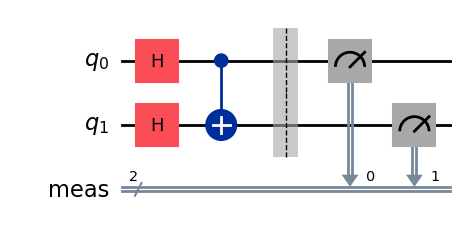

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'01': 247, '10': 235, '00': 267, '11': 275}



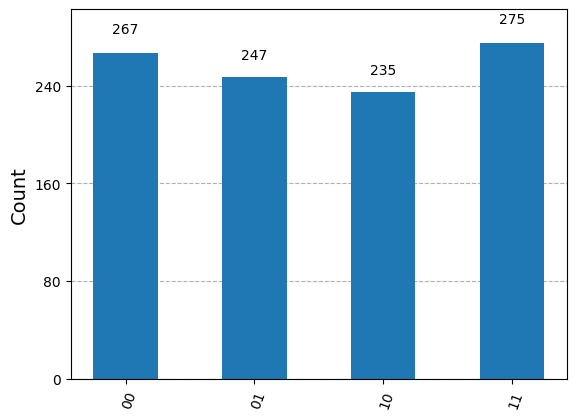

In [ ]:
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)

print(f"Measurement results: {counts}\n")
plot_histogram(counts)


9. Visualizing Quantum State Probabilities
Overview: Create a simple visualization of qubit measurement probabilities using a quantum simulator.
Steps:
  1. Prepare a qubit in superposition and measure it multiple times.
  2. Use a Python library to display the probability distribution of measurement outcomes.
  3. Experiment with different initial states and visualize the changes.

Measurement results: {'0': 533, '1': 491}



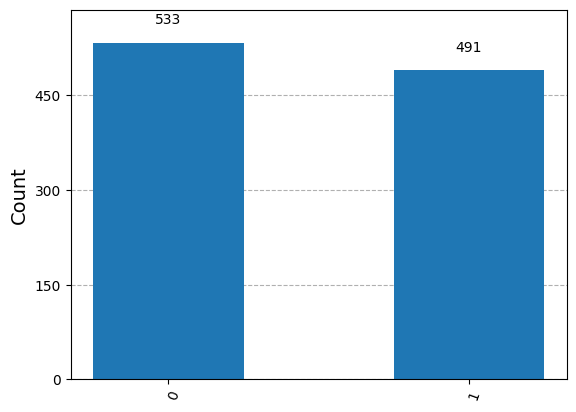

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

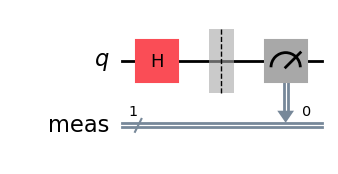

In [ ]:
qc.draw('mpl')

Measurement results: {'0': 502, '1': 522}



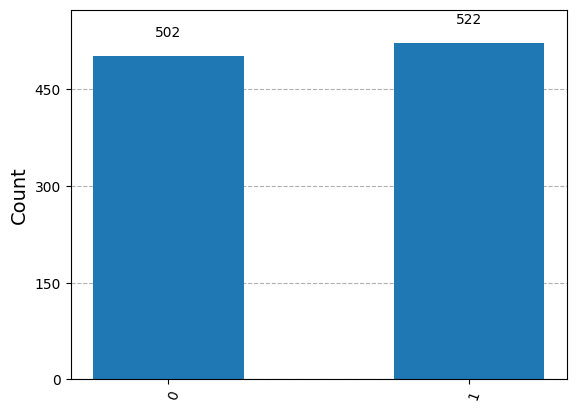

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

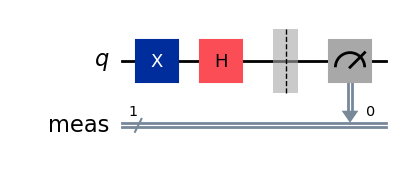

In [ ]:
qc.draw('mpl')

Measurement results: {'0': 550, '1': 474}



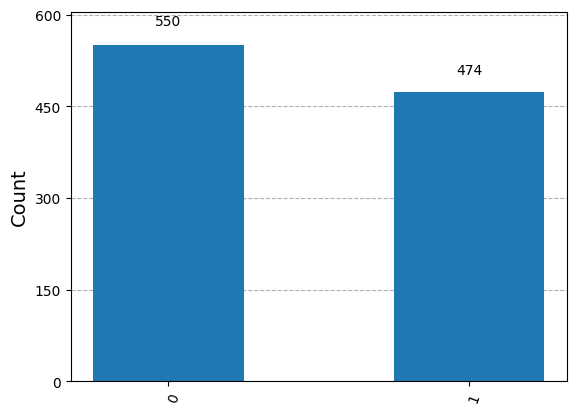

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
qc.h(0)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

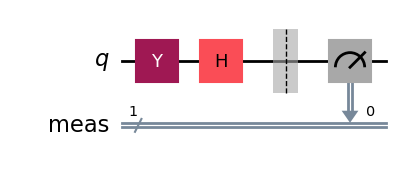

In [ ]:
qc.draw('mpl')

Measurement results: {'1': 530, '0': 494}



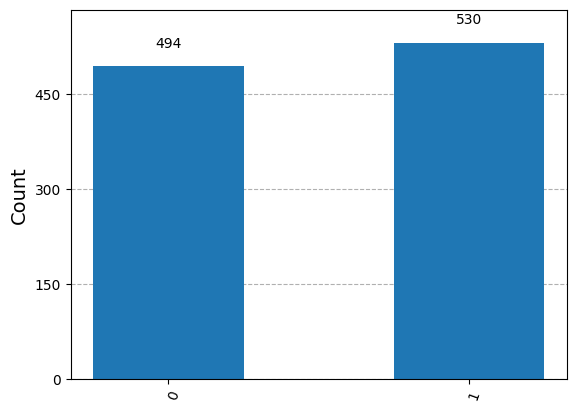

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
qc.h(0)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

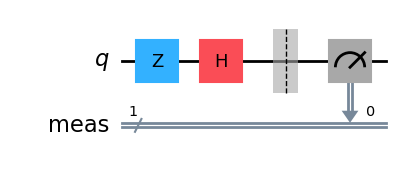

In [ ]:
qc.draw('mpl')

10. Exploring Qubit States with the Bloch Sphere
Overview:  Exploring Qubit States with the Bloch SphereVisualize the state of a qubit on the Bloch Sphere to understand how different quantum gates affect the qubit’s position.
Steps:

  1.Initialize the Qubit: Start with a qubit in the default state |0⟩.

  2.Apply Basic Gates: Experiment with simple gates like the X (NOT), Y, Z, and Hadamard gates to observe how they rotate the qubit on the Bloch Sphere.

  3.Visualize the State: Use Qiskit’s built-in Bloch Sphere visualization tool to plot the qubit state after each operation.
  
  4.Experiment with Combinations: Apply sequences of gates and observe how the qubit state changes, helping to build intuition on quantum rotations and superposition.


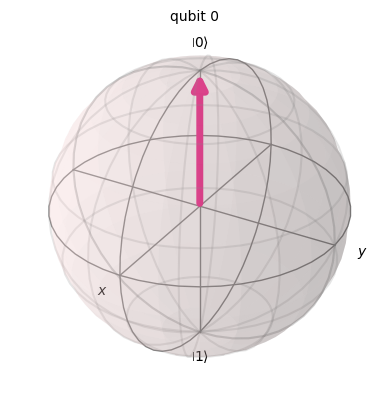

In [ ]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
qc = QuantumCircuit(1)
st = Statevector(qc)
plot_bloch_multivector(st)

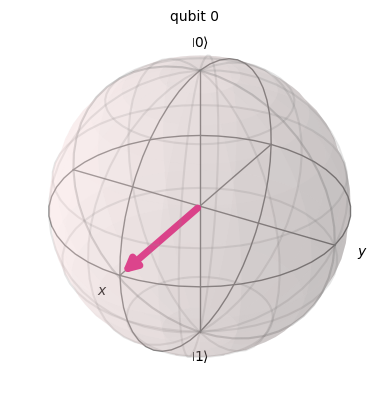

In [ ]:
qc = QuantumCircuit(1)
qc.h(0)
st = Statevector(qc)
plot_bloch_multivector(st)

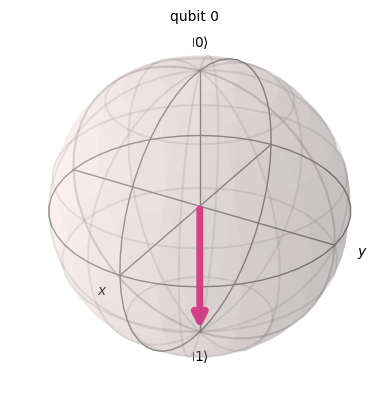

In [ ]:
qc = QuantumCircuit(1)
qc.x(0)
st = Statevector(qc)
plot_bloch_multivector(st)

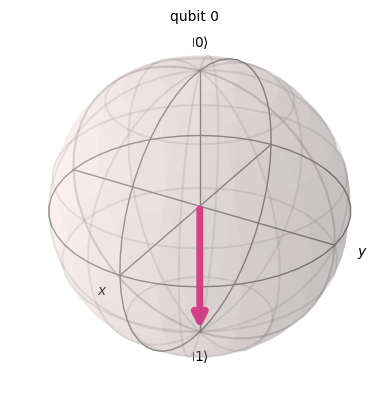

In [ ]:
qc = QuantumCircuit(1)
qc.y(0)
st = Statevector(qc)
plot_bloch_multivector(st)

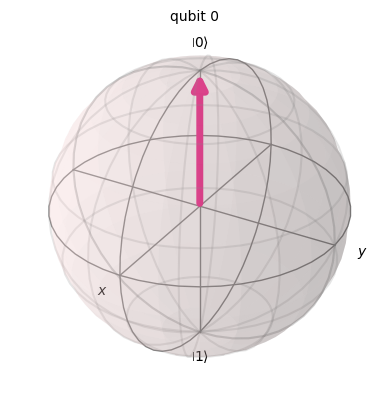

In [ ]:
qc = QuantumCircuit(1)
qc.z(0)
st = Statevector(qc)
plot_bloch_multivector(st)

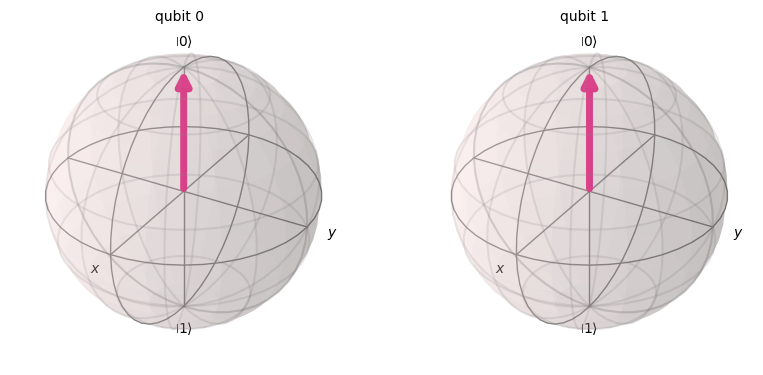

In [ ]:
qc = QuantumCircuit(2)
st = Statevector(qc)
plot_bloch_multivector(st)

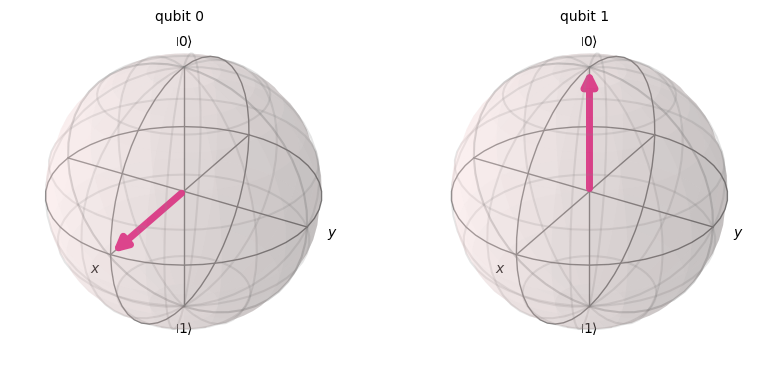

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
st = Statevector(qc)
plot_bloch_multivector(st)

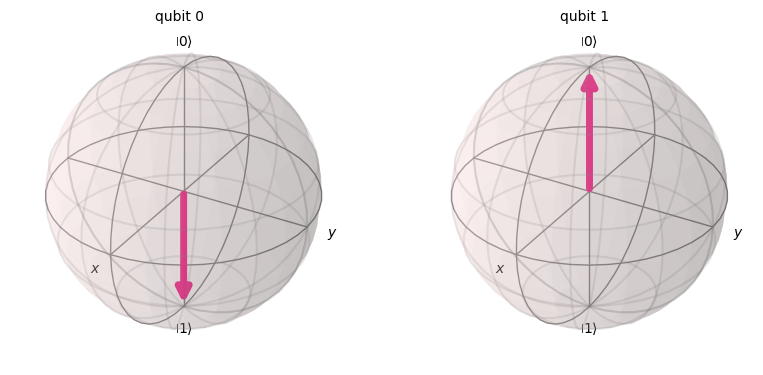

In [ ]:
qc = QuantumCircuit(2)
qc.x(0)
st = Statevector(qc)
plot_bloch_multivector(st)

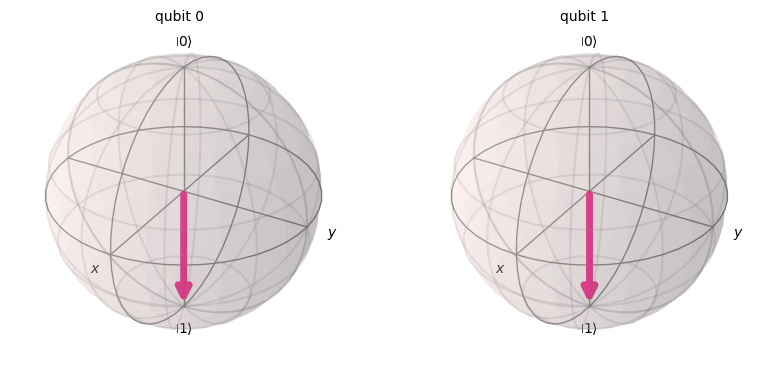

In [ ]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
st = Statevector(qc)
plot_bloch_multivector(st)

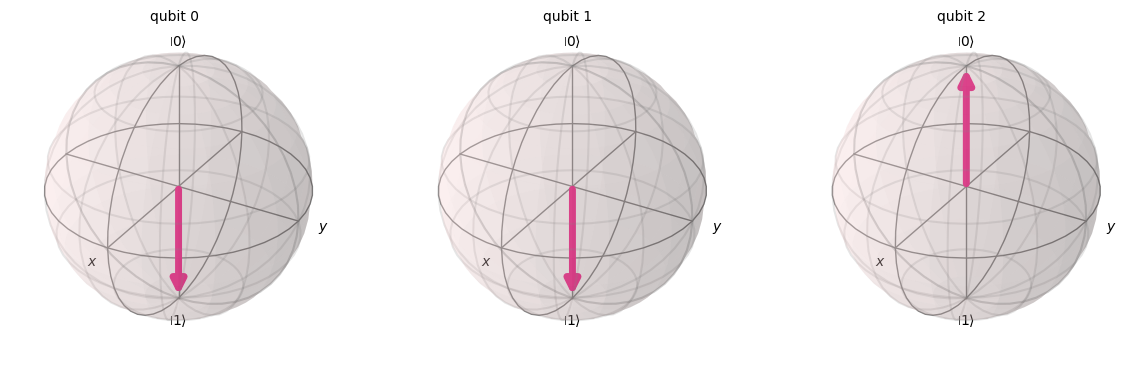

In [ ]:
qc = QuantumCircuit(3)

qc.x(0)
qc.y(1)
qc.z(2)

st = Statevector(qc)
plot_bloch_multivector(st)

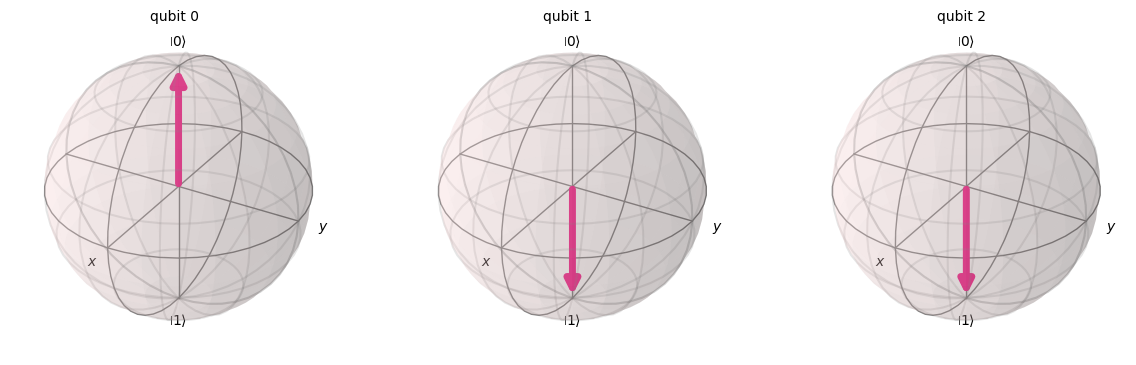

In [ ]:
qc = QuantumCircuit(3)

qc.x(0)
qc.y(0)
qc.x(1)
qc.z(1)
qc.y(2)
qc.z(2)

st = Statevector(qc)
plot_bloch_multivector(st)

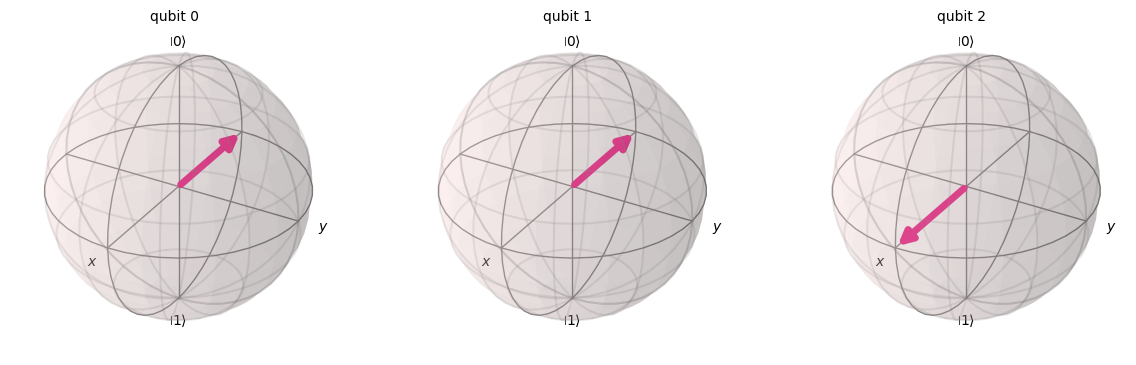

In [ ]:
qc = QuantumCircuit(3)

qc.x(0)
qc.h(0)
qc.x(1)
qc.h(1)
qc.z(2)
qc.h(2)

st = Statevector(qc)
plot_bloch_multivector(st)

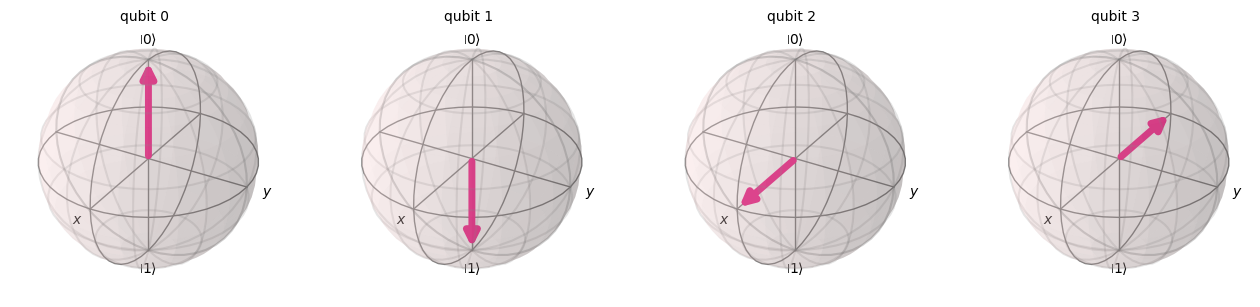

In [ ]:
qc = QuantumCircuit(4)

qc.x(1)
qc.h(2)
qc.x(3)
qc.h(3)

st = Statevector(qc)
plot_bloch_multivector(st)

In [ ]:
!pip install matplotlib
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.0/28.0 MB 57.6 MB/s eta 0:00:00


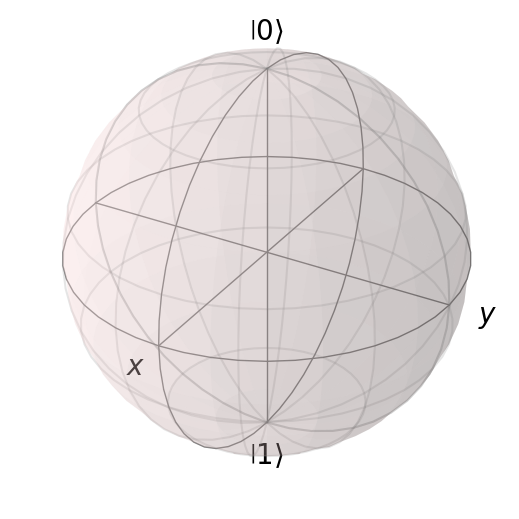

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import Bloch, basis, tensor

# Define the state |Phi+>
phi_plus = (1/np.sqrt(2)) * (tensor(basis(2, 0), basis(2, 0)) + tensor(basis(2, 1), basis(2, 1)))

# Create a Bloch object for visualization
b = Bloch()

# Plot the Bloch sphere for each qubit
b.add_states([phi_plus.ptrace(0)])  # Reduced state of qubit 1
b.add_states([phi_plus.ptrace(1)])  # Reduced state of qubit 2

# Customize the plot
b.show()

In [ ]:
from qiskit import*
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector

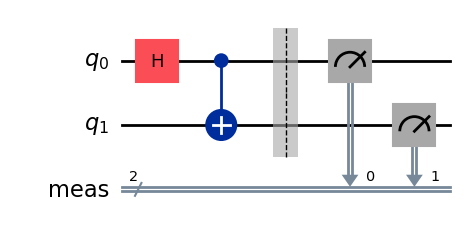

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw('mpl')

Measurement results: {'11': 522, '00': 502}



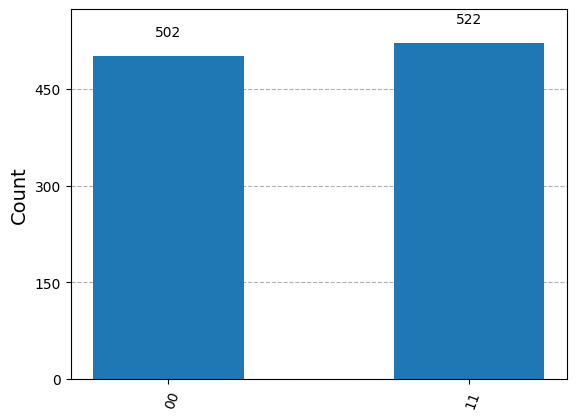

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
q_sim = AerSimulator()
t_qc = transpile(qc, q_sim)
qobj = q_sim.run(t_qc, shots=1024)
result = qobj.result()
counts = result.get_counts(qc)
print(f"Measurement results: {counts}\n")
plot_histogram(counts)

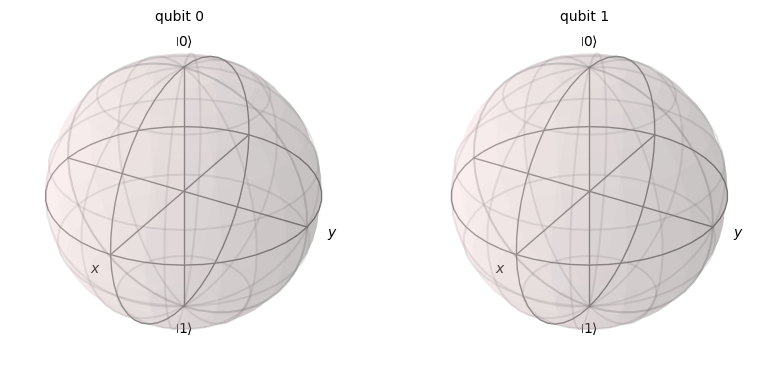

In [ ]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
st = Statevector(qc)
plot_bloch_multivector(st)

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Use the statevector simulator to get the final statevector
simulator = AerSimulator()
t_qc = transpile(qc, simulator)
result = simulator.run(t_qc).result()
statevector = result.get_statevector()

# Plot the Bloch sphere representation
plot_bloch_multivector(statevector)

QiskitError: 'No statevector for experiment "None"'